Please use the hackathon starter notebook "Covid_Tweet_Misinformation_Classification_Mini_Hackathon_submission.ipynb" and the "credentials.txt" file to complete the following assignment.  These files are located in the Week 12 file folder: 

Your final report should be written up in a Jupyter notebook.  It should be posted to a public Github repo as an ipynb AND it should be saved as an html file and submitted to this assignment via courseworks.  Please include the link to your Github repo in this html file.

### Your report should include the following information:

- Citation of paper providing original dataset:  Shahi, Gautam Kishore, Anne Dirkson, and Tim A. Majchrzak. "An exploratory study of covid-19 misinformation on twitter." Online Social Networks and Media 22 (2021): 100104.
- Present examples of tweets from the dataset that demonstrate real information or misinformation.
- Discuss the dataset in general terms and describe why building a predictive model using this data might be practically useful.  Who could benefit from a model like this? Explain.
- Run at least four prediction models to try to predict real or fake tweets well.
  - Use Embedding layers and at least one LSTM layer for at least one of these models
  - Experiment with Bidirectional LSTMs (6.3.8, P219), stacked LSTMS(P322), and dropout regularization(P217) with at least two models.
  - Use Embedding layers and at least one 1D Convolution layer for at least one of these models
  - Discuss which models performed better and point out relevant hyper-parameter values for successful models.
- Submit your best model to the leader board for the Covid Misinformation AI Model Share competition.
- Import the best model from the leader board (whatever the best model is after your final submission)
  - Note: Use the aimodelshare ai.aimsonnx.instantiate_model() function in same manner as example provided in hackathon notebook
  - Visualize the model's structure using tf.kera's model.summary() 
  - Explain how the model's structure is different from your best model.
- Fit the best model from the leader board to training data and evaluate it on test data to complete your report.
- Complete your report by feeding your model some realistic tweets  to see if it returns meaningful/useful results (these tweets can be found online or you can create them yourself).

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 1. Citations: 
paper providing the original COVID-19 Fake News Dataset: Shahi, Gautam Kishore, Anne Dirkson, and Tim A. Majchrzak. "An exploratory study of covid-19 misinformation on twitter." Online Social Networks and Media 22 (2021): 100104.

### Data Source:
Source:Fighting an Infodemic: COVID-19 Fake News Dataset, https://github.com/diptamath/covid_fake_news,https://arxiv.org/abs/2011.03327 

### Import Data

In [ ]:
import pandas as pd
trainingdata=pd.read_csv("https://raw.githubusercontent.com/diptamath/covid_fake_news/main/data/Constraint_Train.csv", usecols = ['tweet','label'])
testdata=pd.read_csv("https://raw.githubusercontent.com/diptamath/covid_fake_news/main/data/english_test_with_labels.csv", usecols = ['tweet','label'])

print(trainingdata.shape)
print(testdata.shape)

(6420, 2)
(2140, 2)


## 2. Example COVID-19 Tweets presenting real information or misinformation

In [ ]:
pd.set_option("display.max_colwidth", -1) #configure pandas to display values without any truncation.
trainingdata.head(20)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


,tweet,label
0,The CDC currently reports 99031 deaths. In general the discrepancies in death counts between different sources are small and explicable. The death toll stands at roughly 100000 people today.,real
1,States reported 1121 deaths a small rise from last Tuesday. Southern states reported 640 of those deaths. https://t.co/YASGRTT4ux,real
2,Politically Correct Woman (Almost) Uses Pandemic as Excuse Not to Reuse Plastic Bag https://t.co/thF8GuNFPe #coronavirus #nashville,fake
3,#IndiaFightsCorona: We have 1524 #COVID testing laboratories in India and as on 25th August 2020 36827520 tests have been done : @ProfBhargava DG @ICMRDELHI #StaySafe #IndiaWillWin https://t.co/Yh3ZxknnhZ,real
4,Populous states can generate large case counts but if you look at the new cases per million today 9 smaller states are showing more cases per million than California or Texas: AL AR ID KS KY LA MS NV and SC. https://t.co/1pYW6cWRaS,real
5,"Covid Act Now found ""on average each person in Illinois with COVID-19 is infecting 1.11 other people. Data shows that the infection growth rate has declined over time this factors in the stay-at-home order and other restrictions put in place."" https://t.co/hhigDd24fE",real
6,If you tested positive for #COVID19 and have no symptoms stay home and away from other people. Learn more about CDC’s recommendations about when you can be around others after COVID-19 infection: https://t.co/z5kkXpqkYb. https://t.co/9PaMy0Rxaf,real
7,Obama Calls Trump’s Coronavirus Response A Chaotic Disaster https://t.co/DeDqZEhAsB,fake
8,"???Clearly, the Obama administration did not leave any kind of game plan for something like this.??�",fake
9,Retraction—Hydroxychloroquine or chloroquine with or without a macrolide for treatment of COVID-19: a multinational registry analysis - The Lancet https://t.co/L5V2x6G9or,fake


## 3. Discuss the dataset in general terms and describe why building a predictive model using this data might be practically useful.  Who could benefit from a model like this? Explain.


The data was collected from two different sources. The first data set consists of false or partially dalse tweetst from fact-checking websites, and the second source comes frmo a random sample of tweets realted to COVID-19. Although the defination of misinformation remains controversial, the researchers defined it as"circulating information that is false", distinguishing from the more commonly used defination for misinformation and disinformation. 

One of the greattest advantages of building a machine learning model for social media text analysis is it's versatility and temporality. Even though informations on Twitter API is still very limited, one could still build upon the API and inform various research areas. From ethical debates, political schemes, and to media criticism, the various topics where text analysis machine learning model could contribute are all still evolving. These types of technique and research practice not only breaks the gap of scientific researches in various areas, but it also helps to make the information circulating online more transparent to the public. Technique practices like building model to classify texts complements areas where theoretical studies might have a lack of. And together, they could help to answer questions such as what kind of information are circulated on social media, how does certain infomation spread virally, and more importantly how does the control of information ciruclated on social media creates or subverts powers. 

## 4. Run at least four prediction models to try to predict real or fake tweets well.
  - Use Embedding layers and at least one LSTM layer for at least one of these models
  - Experiment with Bidirectional LSTMs (6.3.8, P219), stacked LSTMS(P322), and dropout regularization(P217) with at least two models.
  - Use Embedding layers and at least one 1D Convolution layer for at least one of these models
  - Discuss which models performed better and point out relevant hyper-parameter values for successful models.

### Define Preprocessor

In [88]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

# Build vocabulary from training text data
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(trainingdata.tweet)

# preprocessor tokenizes words and makes sure all documents have the same length
def preprocessor(data, maxlen, max_words):

    # maxlen: Cuts off texts after n number of words
    # max_words: Number of words to consider as features

    sequences = tokenizer.texts_to_sequences(data)

    word_index = tokenizer.word_index
    X = pad_sequences(sequences, maxlen=maxlen)

    return X

### Prepare Train and Test Data

In [89]:
# tokenize and pad X data
X_train = preprocessor(trainingdata.tweet, maxlen=40, max_words=10000)
X_test = preprocessor(testdata.tweet, maxlen=40, max_words=10000)

# ohe encode Y data
y_train = pd.get_dummies(trainingdata.label)
y_test = pd.get_dummies(testdata.label)

In [90]:
print(X_train.shape)
print(X_test.shape)

(6420, 40)
(2140, 40)


### Model#1: Use Embedding layers and at least one LSTM layer 

In [157]:
from tensorflow.keras.layers import Dense, Embedding,Flatten
from keras import layers
from tensorflow.keras.models import Sequential

# replace this model with the architectures from the task description
model1 = Sequential()
model1.add(Embedding(10000, 64, input_length=40))
model1.add(layers.LSTM(32))
model1.add(Dense(2, activation='softmax'))

model1.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])

history1 = model1.fit(X_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

Epoch 1/10
161/161 [==============================] - 6s 24ms/step - loss: 0.4493 - acc: 0.7984 - val_loss: 0.2126 - val_acc: 0.9174
Epoch 2/10
161/161 [==============================] - 3s 21ms/step - loss: 0.1386 - acc: 0.9461 - val_loss: 0.1853 - val_acc: 0.9283
Epoch 3/10
161/161 [==============================] - 3s 21ms/step - loss: 0.0777 - acc: 0.9716 - val_loss: 0.1887 - val_acc: 0.9307
Epoch 4/10
161/161 [==============================] - 3s 21ms/step - loss: 0.0526 - acc: 0.9813 - val_loss: 0.2866 - val_acc: 0.9291
Epoch 5/10
161/161 [==============================] - 3s 20ms/step - loss: 0.0336 - acc: 0.9874 - val_loss: 0.2208 - val_acc: 0.9291
Epoch 6/10
161/161 [==============================] - 3s 21ms/step - loss: 0.0245 - acc: 0.9916 - val_loss: 0.2253 - val_acc: 0.9268
Epoch 7/10
161/161 [==============================] - 3s 21ms/step - loss: 0.0199 - acc: 0.9918 - val_loss: 0.2968 - val_acc: 0.9283
Epoch 8/10
161/161 [==============================] - 3s 21ms/step - 

In [139]:
model1.summary()

Model: "sequential_61"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_35 (Embedding)     (None, 40, 64)            640000    
_________________________________________________________________
lstm_89 (LSTM)               (None, 32)                12416     
_________________________________________________________________
dense_48 (Dense)             (None, 2)                 66        
Total params: 652,482
Trainable params: 652,482
Non-trainable params: 0
_________________________________________________________________


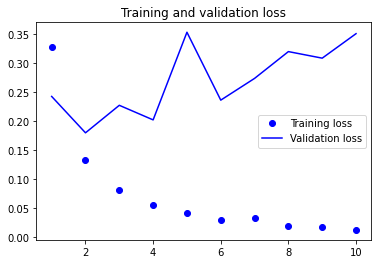

In [140]:
#Plotting Result
import matplotlib.pyplot as plt
loss = history1.history['loss']
val_loss = history1.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [96]:
# format y_pred as labels 
y_pred = model1.predict(X_test).argmax(axis=1)
predicted_labels = [y_test.columns[i] for i in y_pred]
predicted_labels[0:5]

['real', 'fake', 'fake', 'real', 'real']

### Model#2: Training with Bidirectional LSTMs (6.3.8, P219)

In [ ]:
print(X_train.shape)
print(y_train.shape)

(6420, 40)
(6420, 2)


In [144]:
from tensorflow.keras.layers import Dense, Embedding,Flatten
from keras import layers
from tensorflow.keras.models import Sequential

# Bidirectional LSTMs model 
model2 = Sequential()
model2.add(layers.Embedding(15000,50, input_length=40))
model2.add(layers.Bidirectional(layers.LSTM(50,
                                            dropout=0.5)))
model2.add(layers.Dense(2, activation='sigmoid'))

model2.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

history2 = model2.fit(X_train, y_train,
                    epochs=4,
                    batch_size=32,
                    validation_split=0.2)


Epoch 1/4
161/161 [==============================] - 11s 43ms/step - loss: 0.4590 - acc: 0.7794 - val_loss: 0.2198 - val_acc: 0.9190
Epoch 2/4
161/161 [==============================] - 6s 39ms/step - loss: 0.1710 - acc: 0.9350 - val_loss: 0.2064 - val_acc: 0.9174
Epoch 3/4
161/161 [==============================] - 6s 38ms/step - loss: 0.1129 - acc: 0.9607 - val_loss: 0.2745 - val_acc: 0.9104
Epoch 4/4
161/161 [==============================] - 6s 38ms/step - loss: 0.0853 - acc: 0.9702 - val_loss: 0.2061 - val_acc: 0.9346


In [146]:
model2.summary()

Model: "sequential_65"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_39 (Embedding)     (None, 40, 50)            750000    
_________________________________________________________________
bidirectional_12 (Bidirectio (None, 100)               40400     
_________________________________________________________________
dense_52 (Dense)             (None, 2)                 202       
Total params: 790,602
Trainable params: 790,602
Non-trainable params: 0
_________________________________________________________________


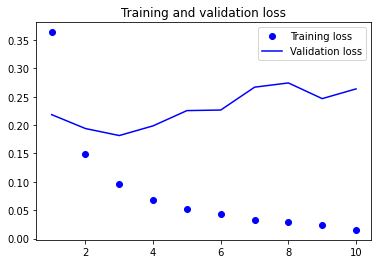

In [147]:
#Plotting Result
import matplotlib.pyplot as plt
loss = history3.history['loss']
val_loss = history3.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

### Model #3: Dropout Regularization LSTMS Model

In [43]:

y_train_array = y_train.to_numpy().reshape((1, 6420,2))


In [149]:

# stacked LSTMs model 
# replace this model with the architectures from the task description
model3 = Sequential()
model3.add(Embedding(15000, 64, input_length=40))
model3.add(layers.LSTM(64, 
                       dropout=0.5))
model3.add(Dense(2, activation='softmax'))

model3.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])

history3 = model3.fit(X_train, y_train,
                    epochs=8,
                    batch_size=32,
                    validation_split=0.2)

Epoch 1/8
161/161 [==============================] - 7s 33ms/step - loss: 0.4724 - acc: 0.7717 - val_loss: 0.2483 - val_acc: 0.8980
Epoch 2/8
161/161 [==============================] - 5s 30ms/step - loss: 0.1842 - acc: 0.9266 - val_loss: 0.2358 - val_acc: 0.9058
Epoch 3/8
161/161 [==============================] - 5s 30ms/step - loss: 0.1381 - acc: 0.9467 - val_loss: 0.1828 - val_acc: 0.9206
Epoch 4/8
161/161 [==============================] - 5s 30ms/step - loss: 0.0970 - acc: 0.9562 - val_loss: 0.1666 - val_acc: 0.9346
Epoch 5/8
161/161 [==============================] - 5s 30ms/step - loss: 0.0774 - acc: 0.9729 - val_loss: 0.1725 - val_acc: 0.9330
Epoch 6/8
161/161 [==============================] - 5s 30ms/step - loss: 0.0718 - acc: 0.9732 - val_loss: 0.2138 - val_acc: 0.9307
Epoch 7/8
161/161 [==============================] - 5s 30ms/step - loss: 0.0526 - acc: 0.9834 - val_loss: 0.1826 - val_acc: 0.9338
Epoch 8/8
161/161 [==============================] - 5s 30ms/step - loss: 0.

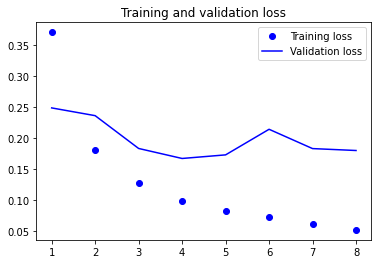

In [187]:
#Plotting Result
import matplotlib.pyplot as plt
loss = history3.history['loss']
val_loss = history3.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

### Model#4: Dropout regularization(P217) with Stacked LSTM Model

In [74]:
from tensorflow.keras.layers import SimpleRNN, LSTM,Embedding
# Bidirectional LSTMs model 
model4 = Sequential()
model4.add((layers.LSTM(32, return_sequences= True,
                        input_shape=( 6420, 40))))
model4.add((layers.LSTM(32, return_sequences= True)))
model4.add((layers.LSTM(32)))
model4.add(layers.Dense(2, activation='softmax'))

model4.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])

history4 = model4.fit(X_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

Epoch 1/10


ValueError: ignored

### Model#5: Use Embedding layers and at least one 1D Convolution layer Model

In [152]:

model5 = Sequential()
model5.add(layers.Embedding(10000, 25, input_length=40))
model5.add(layers.Conv1D(32, 4, activation='relu')) 
model5.add(layers.MaxPooling1D(5)) 
model5.add(layers.Conv1D(32, 4, activation='relu'))
model5.add(layers.GlobalMaxPooling1D())
model5.add(layers.Dense(2))

model5.summary()

model5.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])

history5 = model5.fit(X_train, y_train,
                    epochs=4,
                    batch_size=32,
                    validation_split=0.2)


Model: "sequential_70"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_44 (Embedding)     (None, 40, 25)            250000    
_________________________________________________________________
conv1d_24 (Conv1D)           (None, 37, 32)            3232      
_________________________________________________________________
max_pooling1d_12 (MaxPooling (None, 7, 32)             0         
_________________________________________________________________
conv1d_25 (Conv1D)           (None, 4, 32)             4128      
_________________________________________________________________
global_max_pooling1d_9 (Glob (None, 32)                0         
_________________________________________________________________
dense_57 (Dense)             (None, 2)                 66        
Total params: 257,426
Trainable params: 257,426
Non-trainable params: 0
_______________________________________________

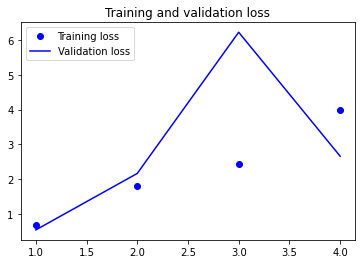

In [153]:
#Plotting Result
import matplotlib.pyplot as plt
loss = history5.history['loss']
val_loss = history5.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

### 4. Discuss which models performed better and point out relevant hyper-parameter values for successful models. 

In general, all four models with LTSM model performed similarily well. The second model with bidirectional LSTM with dropout regularization performed the best with a validation accuracy score of 93.6. In the text analysis, the sequential order of words and phrases is not critical for us to interprete the semantic meaning. Therefore applying bidirectional, the model will process the sequence from both ways, which means the bidirectional model might be able o catch patterns overlooked by a regular technique. With some dropout regularizations, models with the bidirectional technique could potentially significantly improve performances. 

## Submit Placeholder Model

In [84]:
# install aimodelshare library
%%capture
! pip install aimodelshare --upgrade --extra-index-url https://test.pypi.org/simple/ 

In [85]:
import aimodelshare as ai
from aimodelshare.aimsonnx import model_to_onnx

In [86]:
# save preprocessor
ai.export_preprocessor(preprocessor,"")

In [161]:
# save model in onnx format
onnx_model = model_to_onnx(model2, framework='keras',
                          transfer_learning=False,
                          deep_learning=True)

with open("onnx_model.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

INFO:tensorflow:Assets written to: /tmp/assets


INFO:tensorflow:Assets written to: /tmp/assets


In [122]:
# set credentials for modeltoapi function 
# make sure you have uploaded your credentials.txt file
from aimodelshare.aws import set_credentials
api_url = "https://wvr23l2z9i.execute-api.us-east-1.amazonaws.com/prod/m"

set_credentials(apiurl=api_url,credential_file="credentials.txt", type="submit_model", manual=False)

AI Model Share login credentials set successfully.
AWS credentials set successfully.


In [162]:
# submit model and predictions to competition
ai.submit_model("onnx_model.onnx",
                api_url,
                prediction_submission=predicted_labels,
                preprocessor="preprocessor.zip")

'Your model has been submitted as model version 83'

In [163]:
# check leaderboard
data=ai.get_leaderboard(api_url, verbose=3)
ai.leaderboard.stylize_leaderboard(data)

,accuracy,f1_score,precision,recall,ml_framework,transfer_learning,deep_learning,model_type,depth,num_params,bidirectional_layers,conv1d_layers,dense_layers,embedding_layers,flatten_layers,globalmaxpooling1d_layers,lstm_layers,maxpooling1d_layers,simplernn_layers,relu_act,sigmoid_act,softmax_act,tanh_act,loss,optimizer,model_config,username,version
0,95.09%,95.09%,95.07%,95.12%,keras,False,True,Sequential,3,161922,nan,nan,1,1,1.000000,nan,nan,nan,nan,nan,nan,1.000000,nan,str,RMSprop,"{'name': 'sequential', 'layers...",hpeters,66
1,95.09%,95.09%,95.07%,95.12%,keras,False,True,Sequential,3,161922,nan,nan,1,1,1.000000,nan,nan,nan,nan,nan,nan,1.000000,nan,str,RMSprop,"{'name': 'sequential', 'layers...",hpeters,67
2,95.00%,94.99%,94.97%,95.02%,keras,False,True,Sequential,5,1081482,1.000000,nan,2,1,nan,nan,1.000000,nan,nan,1.000000,nan,1.000000,1.000000,str,RMSprop,"{'name': 'sequential_29', 'lay...",kagenlim,61
3,94.86%,94.85%,94.84%,94.87%,keras,False,True,Sequential,5,1035746,nan,nan,2,1,nan,nan,2.000000,nan,nan,1.000000,nan,1.000000,2.000000,str,RMSprop,"{'name': 'sequential_3', 'laye...",kagenlim,19
4,94.77%,94.76%,94.74%,94.78%,keras,False,True,Sequential,9,1313030,nan,nan,2,1,1.000000,nan,1.000000,nan,4.000000,nan,3.000000,nan,4.000000,str,RMSprop,"{'name': 'sequential_1', 'laye...",kka2120,69
5,94.58%,94.57%,94.57%,94.57%,keras,False,True,Sequential,5,1070202,nan,nan,2,1,nan,nan,2.000000,nan,nan,1.000000,nan,1.000000,2.000000,str,RMSprop,"{'name': 'sequential_4', 'laye...",kagenlim,60
6,94.49%,94.47%,94.47%,94.48%,keras,False,True,Sequential,3,161282,nan,nan,1,1,1.000000,nan,nan,nan,nan,nan,nan,1.000000,nan,str,RMSprop,"{'name': 'sequential', 'layers...",newusertest,4
7,94.35%,94.34%,94.32%,94.37%,keras,False,True,Sequential,6,148066,nan,2.000000,1,1,1.000000,nan,nan,1.000000,nan,2.000000,nan,1.000000,nan,str,RMSprop,"{'name': 'sequential_72', 'lay...",prajseth,40
8,94.25%,94.24%,94.24%,94.24%,keras,False,True,Sequential,3,98818,nan,nan,1,1,nan,nan,1.000000,nan,nan,nan,nan,1.000000,1.000000,str,RMSprop,"{'name': 'sequential_78', 'lay...",prajseth,41
9,94.21%,94.19%,94.18%,94.21%,keras,False,True,Sequential,3,402690,nan,nan,1,1,nan,nan,1.000000,nan,nan,nan,1.000000,nan,1.000000,str,RMSprop,"{'name': 'sequential_5', 'laye...",xc2303_xc,62


### 5. Import the best model from the leader board (whatever the best model is after your final submission)
  - Note: Use the aimodelshare ai.aimsonnx.instantiate_model() function in same manner as example provided in hackathon notebook
  - Visualize the model's structure using tf.kera's model.summary() 
  - Explain how the model's structure is different from your best model.


In [159]:
 # Get best model architecture and view model summary, change version arg as needed
 
 bestmodel = ai.aimsonnx.instantiate_model(api_url, version=61) 

 bestmodel.summary()

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_27 (Embedding)     (None, 40, 100)           1000000   
_________________________________________________________________
bidirectional_5 (Bidirection (None, 40, 80)            45120     
_________________________________________________________________
lstm_37 (LSTM)               (None, 60)                33840     
_________________________________________________________________
dense_43 (Dense)             (None, 40)                2440      
_________________________________________________________________
dense_44 (Dense)             (None, 2)                 82        
Total params: 1,081,482
Trainable params: 1,081,482
Non-trainable params: 0
_________________________________________________________________


In [177]:
model2.summary()

Model: "sequential_65"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_39 (Embedding)     (None, 40, 50)            750000    
_________________________________________________________________
bidirectional_12 (Bidirectio (None, 100)               40400     
_________________________________________________________________
dense_52 (Dense)             (None, 2)                 202       
Total params: 790,602
Trainable params: 790,602
Non-trainable params: 0
_________________________________________________________________


In [169]:
# Compare two model versions to see diffs
ai.aimsonnx.compare_models(api_url, version_list=[66,83]) 



,Model_66_Layer,Model_66_Shape,Model_66_Params,Model_83_Layer,Model_83_Shape,Model_83_Params
0,Embedding,"(None, 60, 16)",160000,Embedding,"(None, 40, 50)",750000
1,Flatten,"(None, 960)",0,Bidirectional,"(None, 100)",40400
2,Dense,"(None, 2)",1922,Dense,"(None, 2)",202


Instead of using a bidirectional layer, the best performing model employs a flatten layer compared to mine.

### 6. Fit the best model from the leader board to training data and evaluate it on test data to complete your report.



In [174]:
# Bidirectional LSTMs model 
model_c = Sequential()
model_c.add(layers.Embedding(10000,60, input_length=40))
model_c.add(Flatten())
model_c.add(layers.Dense(2, activation='sigmoid'))

model_c.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

history_C = model_c.fit(X_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

Epoch 1/10
161/161 [==============================] - 1s 5ms/step - loss: 0.5443 - acc: 0.7365 - val_loss: 0.3206 - val_acc: 0.8645
Epoch 2/10
161/161 [==============================] - 1s 4ms/step - loss: 0.2585 - acc: 0.8951 - val_loss: 0.2241 - val_acc: 0.9128
Epoch 3/10
161/161 [==============================] - 1s 4ms/step - loss: 0.1507 - acc: 0.9456 - val_loss: 0.1894 - val_acc: 0.9283
Epoch 4/10
161/161 [==============================] - 1s 4ms/step - loss: 0.1025 - acc: 0.9653 - val_loss: 0.1758 - val_acc: 0.9291
Epoch 5/10
161/161 [==============================] - 1s 4ms/step - loss: 0.0742 - acc: 0.9723 - val_loss: 0.1734 - val_acc: 0.9338
Epoch 6/10
161/161 [==============================] - 1s 4ms/step - loss: 0.0524 - acc: 0.9835 - val_loss: 0.1738 - val_acc: 0.9322
Epoch 7/10
161/161 [==============================] - 1s 4ms/step - loss: 0.0439 - acc: 0.9853 - val_loss: 0.1743 - val_acc: 0.9346
Epoch 8/10
161/161 [==============================] - 1s 4ms/step - loss: 0.

In [179]:
score, acc = model2.evaluate(X_test, y_test)
print('Test score:', score)
print('Test accuracy:', acc)

67/67 [==============================] - 1s 8ms/step - loss: 0.1698 - acc: 0.9407
Test score: 0.16978661715984344
Test accuracy: 0.9406542181968689


In [176]:
score, acc = model_c.evaluate(X_test, y_test)
print('Test score:', score)
print('Test accuracy:', acc)

67/67 [==============================] - 0s 1ms/step - loss: 0.1618 - acc: 0.9463
Test score: 0.1618259847164154
Test accuracy: 0.9462617039680481


### 7. Complete your report by feeding your model some realistic tweets  to see if it returns meaningful/useful results (these tweets can be found online or you can create them yourself).

In [185]:
# How to write a preprocessor function for text preprocessing using keras?

def preprocessor(textinput, maxlen=40):
        from tensorflow.keras.preprocessing.text import Tokenizer
        from tensorflow.keras.preprocessing.sequence import pad_sequences        

        sequences = tokenizer.texts_to_sequences(textinput) # converts words in each text to each word's numeric index in tokenizer dictionary.

        data = pad_sequences(sequences, maxlen=maxlen)
        return data



#See preprocessor output
print(preprocessor(["Health experts in Wuhan knew the wet market at the centre of the coronavirus outbreak was a pandemic risk at least five years before Covid-19 emerged"]).shape)
print(preprocessor(["Health experts in Wuhan knew the wet market at the centre of the coronavirus outbreak was a pandemic risk at least five years before Covid-19 emerged"]))

print(model_c.predict(preprocessor(["Health experts in Wuhan knew the wet market at the centre of the coronavirus outbreak was a pandemic risk at least five years before Covid-19 emerged"])))
print(model_c.predict(preprocessor(["You can't get Covid from vaccination. Not possible."])))

(1, 40)
[[   0    0    0    0    0    0    0    0    0    0    0    0    0   57
   781    7  357 1905    1 3475 1309   27    1  691    2    1   15  206
    54    8   74  145   27  384  468  372  252   10   12 2558]]
[[9.9975109e-01 2.4825335e-04]]
[[0.99796605 0.00209466]]


I randomly picked two tweets online to make the predictition. From the prediction result above, it's very likly the first one is misinformation and the second one is real information. Overall, this result from predictin randomly selected tweets suggests the model does a good job at predicting COVID-19 misinformation on Twitter. 

# Github Repo Link:
https://github.com/GraceXuejingLi/MLProject2021